# Assignment 4 (Week 4)

>**Note**: Late submissions are ***`penalized`***.

## Name: Aminat Owodunni

<br>

### Please show and display all your calculations and results.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# Black code formatter (Optional)
#%load_ext lab_black

### nb_black Installation And Usage

```bash
# On your command line, run:
pip install nb_black 
```


```python
# For jupyter notebook
%load_ext nb_black

# For jupyter lab
%load_ext lab_black
```


### Qs1

#### The data can be found [here](https://drive.google.com/file/d/1WFMBMR4e5o2B1rzDbOWaTorZRuKU3UOD/view?usp=share_link)

a.) Create a new column called **`Name`** from the **`Artist`** column. Return the name of the artist. \
e.g. \
`Tawaraya SÅtatsu, 17th century, Gold leaf and ink on paper`: `Tawaraya SÅ tatsu` \
`Artist Unknown, circa 190 BCE, Marble `: `Artist Unknown`


b.) Create a new column called **`Date`** from the `Artist` column which extracts the date/period
from the `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `1974` \
`Artist Unknown, 196 BCE, Granodiorite`: `196 BCE`

c.) Finally, Create a new column called **`Art_type`** by extracting values from `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `Woodblock print` \
`Artist Unknown, 196 BCE, Granodiorite`: `Granodiorite`

* To validate your results, find the **`unique values`** in **`each column`** you created.

In [2]:
# 1a Enter your solution here
df = pd.read_csv('art.csv')
df.head(2)

,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID
0,academic painting,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u
1,academic painting,No,Wall-mounted,4980,0,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianManFake,12620,5KNFAo3LkdTTJPQkd


In [3]:
df['Name'] = df['Artist'].apply(lambda x: x.split(',')[0])
df.Name.unique()

array(['Leonardo da Vinci', 'Rembrandt van Rijn', 'Artist Unknown',
       'Thomas Gainsborough', 'Georges Seurat', 'Jean-François Millet',
       'Itō Jakuchū', 'Katsushika Hokusai', 'Auguste Rodin',
       'Vincent van Gogh', 'Michelangelo',
       'Joseph Mallord William Turner', 'Hishikawa Moronobu',
       'Thomas Ridgeway Gould', 'Giuseppe Arcimboldo',
       'Sandro Botticelli', 'Arnold Böcklin', 'Thutmose', 'Édouard Manet',
       'Paul Cézanne', 'Johannes Vermeer', 'Tōshūsai Sharaku',
       'Pieter Brueghel the Elder', 'John Everett Millais',
       'Diego Velázquez', 'Francisco de Goya', 'Tawaraya Sōtatsu',
       'Eugène Delacroix'], dtype=object)

In [4]:
# 1b Enter your solution here
df['Date'] = df['Artist'].apply(lambda x: x.split(',')[1])
df.Date.unique()

array([' circa 1487', ' 1642', ' 1000-400 BCE', ' 1770', ' circa 130 BCE',
       ' circa 1885', ' 1857', ' 18th century', ' circa 1831', ' 1902',
       ' circa 1503', ' circa 1888', ' circa 1504', ' 1839',
       ' 17th century', ' circa 1883', ' 196 BCE', ' circa 1563',
       ' circa 1850', ' 5th century BCE', ' circa 1485', ' 1883',
       ' circa 1345 BCE', ' 1866', ' circa 1899', ' circa 1882',
       ' circa 1658', ' 2nd century CE', ' circa 1000 BCE', ' 1794',
       ' 1565', ' circa 1490', ' 1852', ' circa 1656', ' 1200 BCE',
       ' 1889', ' circa 190 BCE', ' circa 1805', ' 210 BCE',
       ' circa 1665', ' 1830'], dtype=object)

In [5]:
# 1c Enter your solution here
df['Art_type'] = df['Artist'].apply(lambda x: x.split(',')[-1])
df.Art_type.unique()

array([' Pen and ink on paper', ' Oil on canvas', ' Fired pottery',
       ' Marble', ' Dyed silk', ' Woodblock print', ' Bronze',
       ' Oil on poplar', ' Color on silk', ' Granodiorite',
       ' Tempura on canvas', ' Oil on wood', ' circa 1345 BCE',
       ' andesite', ' Oil on wood panel', ' Earthenware',
       ' Gold leaf and ink on paper'], dtype=object)

### Qs 2:

#### The data can be found [here](https://drive.google.com/file/d/1xSfSnIWZEWo9WHIXSRfOKRGcCyZ-iNtk/view?usp=share_link)

a.) Write a `Python class`, **`NumericTransformers`**, that can be used to apply the following transformations to columns: `no_of_adults`, `arrival_month` and `no_of_special_requests`

    i.) Sigmoid transformation
    
$$\sigma(x) = \frac {1}{1+e^{-x}}$$
    
    ii.) Cube root transformation
    
$$x_{transformed} = \sqrt[3]{x}$$
    
    
```python
class NumericTransformers:
    """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
    pass
```

Create a `new dataframe` and find the **`descriptive summary statistics`** of the newly transformed features for **each transformation**. \
Hint: Use `.describe()`

b.) Find the **correlation** between the numeric data . Visualize your result using **Seaborn's heatmap**.


In [6]:
# 2ai Enter your solution here

In [7]:
# 2aii Enter your solution here

In [8]:
# 2b Enter your solution here

### Qs 3:

Given the string shown below

```python
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)
```
a.) Write a RegEx pattern that displays all the valid:

    i.) URLs

    ii.) phone numbers (11 or more digits)

b.) Given the array shown below:

```python
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
```

i.) write a code that **normalizes** the array, `A` using:

$$
x_{new} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}
$$

* Return the **descriptive statistics** of the normalized array.

ii.) Create **histogram** of the normalized array, `A`

In [9]:
# 3ai Enter your solution here

my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)

re.findall(r"https://[^\s]+\s?", my_string)

['https://zadarma.com/en/tariffs/numbers/united-states/mobile/ ',
 'https://zadarma.com/en/tariffs/numbers/united-states/mobile/ ',
 'https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link ']

In [10]:
# 3aii Enter your solution here
re.findall(r"[-)+\d{1,3}(]*\s*\d{3,4}\s*\d{3,4}\s*\d{2,4}", my_string)

['(+234) 287 576 3098', ' 0808 576 8013', '0803 5771 42']

In [11]:
#re.findall(r"([-+)(0-9]*)", my_string)

In [12]:
# 3bi Enter your solution here
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))

def normalize(X_vector: np.ndarray):
    X_new = (X_vector - np.min(X_vector)) / (np.max(X_vector) - np.min(X_vector))
    return pd.DataFrame(X_new).describe()

normalize(X_vector=A)

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.489447,0.546130,0.448717,0.397542,0.646515
std,0.289048,0.304508,0.271435,0.354210,0.333582
min,0.133545,0.007978,0.059527,0.022381,0.000000
25%,0.269679,0.365662,0.252205,0.114887,0.410454
50%,0.407325,0.549814,0.405082,0.330894,0.705488
75%,0.773544,0.807233,0.585977,0.518566,0.929375
max,0.909155,0.929447,0.919950,0.990693,1.000000


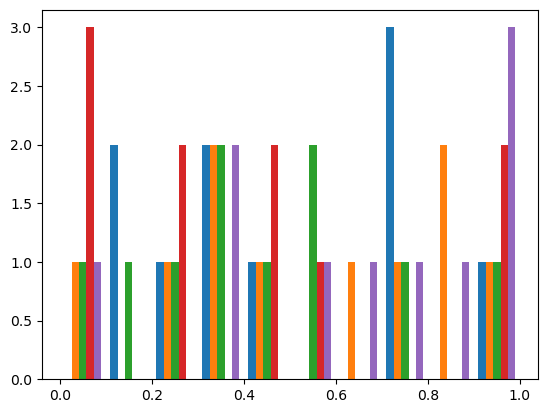

In [13]:
# 3bii Enter your solution here
def plot_arr(X_vector: np.ndarray):
    X_new = (X_vector - np.min(X_vector)) / (np.max(X_vector) - np.min(X_vector))
    return plt.hist(X_new)

plot_arr(X_vector=A);

### Qs 4

#### The data can be found [here](https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link)

a.) Clean the following columns: `price`, `SSD(GB)`, `warranty(years)`, `Display(inch)` \
Note: Return numerical values for the cleaned columns with the corresponding unit as the appended to the column name. \
e.g. \
SSD(GB) retuns: \
`512 GB HDD|512 GB SSD`: `512` \
The Display(inch) retuns: \
`38.1 cm (15 inch) Display`: `15`

* You might need to create **new columns** with the corresponding **column names**.
* **To validate your result, run**:

```python
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)
```

b.) 

i.) Create a new column called `RAM_type` which extract the type of RAM. \
e.g. \
`32 GB LPDDR5 RAM`: `LPDDR5`

ii.) Create a new column called `is_SSD` which which checks whether the `SSD` storage is SSD or not. It returns `True` if it's an `SSD` otherwise, `False`

c.) Using the approriate column, create an new column called `Brand_name` by extracting the brand names. Validate your result by displaying the unique values in `Brand_name`

In [14]:
# 4a Enter your solution here
df=pd.read_csv('laptops.csv')
df.sample(2)

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
870,870,DELL Ryzen 7 Octa Core AMD R7-5800H - (16 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeForce R...,"₹1,07,990","₹1,49,18727% off",AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Premium Support
200,200,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4600H - (8 GB/1 TB SSD/Windows 11 Home/4 GB Graphics/NVID...,"₹59,990","₹75,99021% off",AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB SSD,39.62 cm (15.6 inch) Display,NaN,1 Year Onsite Warranty


In [15]:
df['price'] = df['price'].str.strip(',').str[1:]
df.head(2)

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...,"37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Keyboard,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,"35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty


In [16]:
df['SSD(GB)'] = df.SSD.str.extract("(\d{3})")
df['SSD(GB)'].sample(5)

882    512
521    NaN
334    NaN
225    NaN
244    512
Name: SSD(GB), dtype: object

In [17]:
df['warranty(years)'] = df['warranty'].str.extract('(\d+.Year|Years|YEAR|YEARS|year|years|month|Month|months|Months|MONTH|MONTHS)')
df['warranty(years)'].sample(5)

759    1 Year
543    1 Year
85        NaN
5      1 Year
3      1 Year
Name: warranty(years), dtype: object

In [18]:
df['Display(inch)']= df['Display'].str.extract('(\d{2})\sinch')
df['Display(inch)'].sample(5)


576    NaN
243    NaN
202    NaN
681    NaN
782    NaN
Name: Display(inch), dtype: object

In [19]:
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)

,price,SSD(GB),warranty(years),Display(inch)
242,"56,340",256,1 Year,14
441,"58,900",512,1 Year,NaN
260,"87,701",512,1 Year,NaN
546,"30,490",256,1 Year,14
849,"24,540",256,1 Year,14
264,"2,11,990",NaN,1 Year,NaN
768,"61,890",256,YEAR,NaN
790,"1,03,990",512,1 Year,NaN
293,"74,890",NaN,NaN,NaN
442,"1,15,736",NaN,1 Year,NaN


In [20]:
# 4bi Enter your solution here
df['RAM_type']= df['RAM'].str.extract('([A-Z]+\d.)')
df['RAM_type'].sample(5)


492    DDR4 
244    DDR4 
484    DDR4 
130    DDR4 
372    DDR4 
Name: RAM_type, dtype: object

In [21]:
#4bii
df['is_SSD'] = df['SSD'].str.contains('SSD')
df['is_SSD'].sample(5)

255     True
458    False
859     True
668     True
326     True
Name: is_SSD, dtype: bool

In [22]:
# 4ci Enter your solution here
df['Brand_name'] = df['title'].apply(lambda x: x.split(' ')[0])
df.Brand_name.unique()

array(['DELL', 'HP', 'Lenovo', 'ASUS', 'RedmiBook', 'acer', 'Infinix',
       'APPLE', 'MSI', 'SAMSUNG', 'realme', 'ALIENWARE', 'GIGABYTE',
       'Avita', 'Nokia', 'Vaio', 'Mi', 'LG', 'Ultimus'], dtype=object)